# Assignment 2:  Naive Bayes Algorithm and Tic Tac Toe
*Margaret Thomann - February 9, 2018 *

In this assignment, I will implement the Naive Bayes Algorithm on the provided Tic Tac Toe data set.  Predicted probabilities will then be found for the test data set.

### Calculating Class Conditional Probability Table

#### Cell Class 
Will be used to contain the values for each of the positive and negative class counts

In [1]:
class Cell:
    def __init__(self, type):
        self.type = type
        self.x_positive = 0
        self.o_positive = 0
        self.b_positive = 0
        self.x_negative = 0
        self.o_negative = 0
        self.b_negative = 0

#### Reading in the data from the text file, performing and printing the counts
The data will be read in from the file and values will be assigned to the appropriate classes.

In [2]:
features = ["TL", "TM", "TR",
           "ML", "MM", "MR",
           "BL", "BM", "BR"]
feature_values = ["x", "o", "b"]
positive_win_count = 0
negative_win_count = 0
board = []

for feature in features:
    board.append(Cell(feature))
    
training_file = open('tic-tac-toe.data.txt')
for line in training_file.readlines():
    state_list = line.split()
    win_class = state_list[-1]
    if win_class == "positive":
        positive_win_count += 1
    else:
        negative_win_count += 1
    for i in range(9):
        if win_class == "positive":
            if state_list[i] == "x":
                board[i].x_positive += 1
            elif state_list[i] == "o":
                board[i].o_positive += 1
            elif state_list[i] == "b":
                board[i].b_positive += 1
        elif win_class == "negative":
            if state_list[i] == "x":
                board[i].x_negative += 1
            elif state_list[i] == "o":
                board[i].o_negative += 1
            elif state_list[i] == "b":
                board[i].b_negative += 1
print "---------------------------"
print "| DATA PROCESSING RESULTS |"         
print "---------------------------\n"
print "----Win Counts----"
print "x won:   {:^3d} times".format(positive_win_count)
print "x lost:  {:^3d} times".format(negative_win_count)
print "\n----Cell Counts---"
for feature in board:
    print feature.type
    print "   |    P    |    N    |"
    print "------------------------"
    print "X  | {:^7d} | {:^7d} |".format(feature.x_positive, feature.x_negative)
    print "O  | {:^7d} | {:^7d} |".format(feature.o_positive, feature.o_negative)
    print "B  | {:^7d} | {:^7d} |".format(feature.b_positive, feature.b_negative)
    print "------------------------"
    print "X  | {:^3d}/{:^3d} | {:^3d}/{:^3d} |".format(feature.x_positive, positive_win_count, feature.x_negative, negative_win_count)
    print "O  | {:^3d}/{:^3d} | {:^3d}/{:^3d} |".format(feature.o_positive, positive_win_count, feature.o_negative, negative_win_count)
    print "B  | {:^3d}/{:^3d} | {:^3d}/{:^3d} |".format(feature.b_positive, positive_win_count, feature.b_negative, negative_win_count)
    print "_____________________\n"
    

---------------------------
| DATA PROCESSING RESULTS |
---------------------------

----Win Counts----
x won:   615 times
x lost:  321 times

----Cell Counts---
TL
   |    P    |    N    |
------------------------
X  |   284   |   120   |
O  |   189   |   141   |
B  |   142   |   60    |
------------------------
X  | 284/615 | 120/321 |
O  | 189/615 | 141/321 |
B  | 142/615 | 60 /321 |
_____________________

TM
   |    P    |    N    |
------------------------
X  |   214   |   146   |
O  |   229   |   100   |
B  |   172   |   75    |
------------------------
X  | 214/615 | 146/321 |
O  | 229/615 | 100/321 |
B  | 172/615 | 75 /321 |
_____________________

TR
   |    P    |    N    |
------------------------
X  |   284   |   121   |
O  |   189   |   137   |
B  |   142   |   63    |
------------------------
X  | 284/615 | 121/321 |
O  | 189/615 | 137/321 |
B  | 142/615 | 63 /321 |
_____________________

ML
   |    P    |    N    |
------------------------
X  |   219   |   148   |
O  |   

### Resulting Class Conditional Probability Table

#### Image Display
I created an excel file based on the results found above and generated this table below.

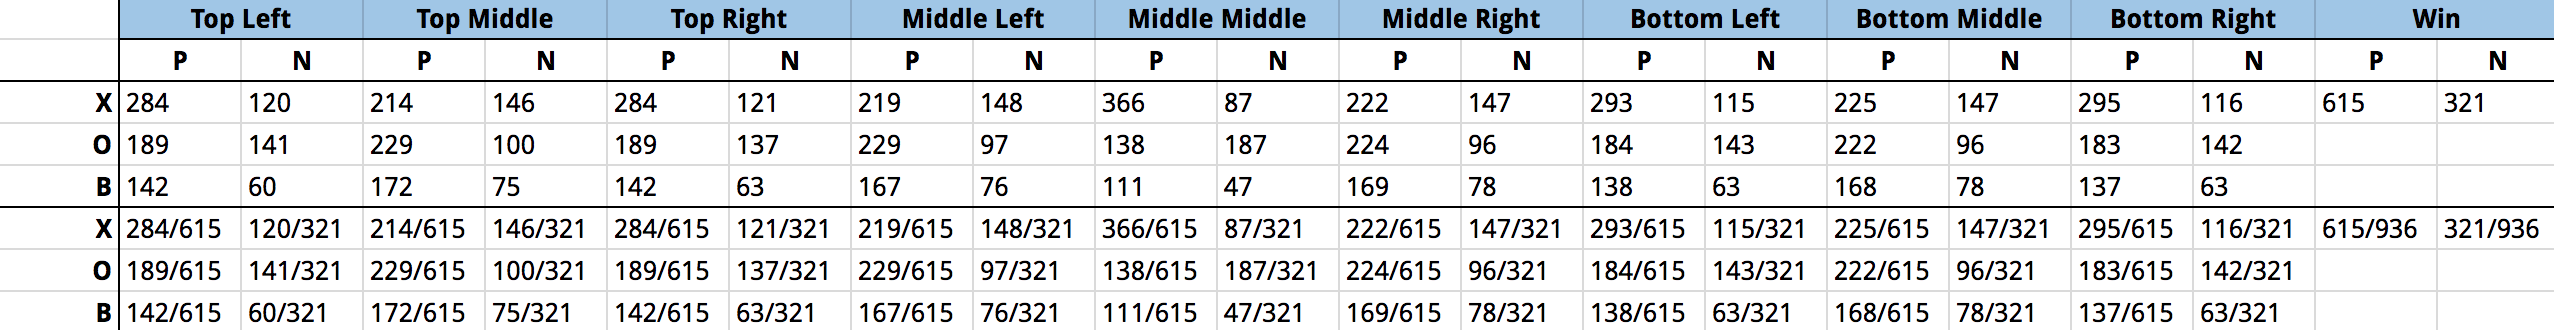

In [3]:
from IPython.display import Image
Image("table.png")

### Predicted Probabilities on the Test Set Data

#### Reading in the data from the text test file and calculating the predictions
The data will be read in from the test file and Naive Bayes will be used.

In [4]:
test_file = open('tic-tac-toe.test.txt')
for line in test_file.readlines():
    state_list = line.split()
    win_class = state_list[-1]
    positive_likelihood_mult = 1
    negative_likelihood_mult = 1
    for i in range(9):
        if state_list[i] == "x":
            positive_likelihood_mult *= (board[i].x_positive / float(positive_win_count))
            negative_likelihood_mult *= (board[i].x_negative / float(negative_win_count))
        elif state_list[i] == "o":
            positive_likelihood_mult *= (board[i].o_positive / float(positive_win_count))
            negative_likelihood_mult *= (board[i].o_negative / float(negative_win_count))
        elif state_list[i] == "b":
            positive_likelihood_mult *= (board[i].b_positive / float(positive_win_count))
            negative_likelihood_mult *= (board[i].b_negative / float(negative_win_count))
    positive_likelihood_mult *= positive_win_count / (float(positive_win_count)+float(negative_win_count))
    negative_likelihood_mult *= negative_win_count / (float(positive_win_count)+float(negative_win_count))
    
    result = 0
    if win_class == "positive":
        result = positive_likelihood_mult / (negative_likelihood_mult + positive_likelihood_mult)
        print "P({} | {}) = {:^7f}".format(win_class, " ".join(state_list[0:9]), result)
    elif win_class == "negative":
        # " ".join(my_list)
        result = positive_likelihood_mult / (negative_likelihood_mult + positive_likelihood_mult)
        print "P({} | {}) = {:^7f}".format(win_class, " ".join(state_list[0:9]), result)
    
    
        

P(positive | x x x x o o b b o) = 0.409973
P(positive | x x x x o b o o b) = 0.407103
P(positive | x x x x o b o b o) = 0.274838
P(positive | x x x x o b b o o) = 0.409239
P(positive | x x x x b o o o b) = 0.702952
P(positive | x x x b o x o o b) = 0.415446
P(positive | x x x b o x o b o) = 0.281758
P(positive | x x x b o x b o o) = 0.417595
P(positive | x x x b o o x o b) = 0.684970
P(positive | x x x b o o x b o) = 0.545485
P(negative | b b o x b o x x o) = 0.628296
P(negative | b b o b x o x x o) = 0.817225
P(negative | b b o b o x o x x) = 0.335949
P(negative | x x o o x x x o o) = 0.750144
P(negative | x x o o o x x x o) = 0.258484
P(negative | x x o o o x x o x) = 0.509630
P(negative | o x x x o o o x x) = 0.244815
P(negative | o x o x x o x o x) = 0.764680
P(negative | o x o x o x x o x) = 0.269508
P(negative | o x o o x x x o x) = 0.770407
P(negative | o o x x x o o x x) = 0.742748
